# Explore here

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf
from pmdarima import auto_arima

import warnings

In [2]:
warnings.filterwarnings("ignore")

In [3]:
data = r"C:\Users\samue\OneDrive\Escritorio\Docs\4GeeksAcademy\26a clase-Time-series\Lake_Bilancino.csv"
data_csv = pd.read_csv(data)
df = pd.DataFrame(data_csv)

## Visualizamos df y checkeamos nulos y duplicados

In [4]:
df.head()

,Date,Rainfall_S_Piero,Rainfall_Mangona,Rainfall_S_Agata,Rainfall_Cavallina,Rainfall_Le_Croci,Temperature_Le_Croci,Lake_Level,Flow_Rate
0,03/06/2002,NaN,NaN,NaN,NaN,NaN,NaN,249.43,0.31
1,04/06/2002,NaN,NaN,NaN,NaN,NaN,NaN,249.43,0.31
2,05/06/2002,NaN,NaN,NaN,NaN,NaN,NaN,249.43,0.31
3,06/06/2002,NaN,NaN,NaN,NaN,NaN,NaN,249.43,0.31
4,07/06/2002,NaN,NaN,NaN,NaN,NaN,NaN,249.44,0.31


In [5]:
df

,Date,Rainfall_S_Piero,Rainfall_Mangona,Rainfall_S_Agata,Rainfall_Cavallina,Rainfall_Le_Croci,Temperature_Le_Croci,Lake_Level,Flow_Rate
0,03/06/2002,NaN,NaN,NaN,NaN,NaN,NaN,249.43,0.31
1,04/06/2002,NaN,NaN,NaN,NaN,NaN,NaN,249.43,0.31
2,05/06/2002,NaN,NaN,NaN,NaN,NaN,NaN,249.43,0.31
3,06/06/2002,NaN,NaN,NaN,NaN,NaN,NaN,249.43,0.31
4,07/06/2002,NaN,NaN,NaN,NaN,NaN,NaN,249.44,0.31
...,...,...,...,...,...,...,...,...,...
6598,26/06/2020,0.0,0.0,0.0,0.0,0.0,22.50,250.85,0.60
6599,27/06/2020,0.0,0.0,0.0,0.0,0.0,23.40,250.84,0.60
6600,28/06/2020,0.0,0.0,0.0,0.0,0.0,21.50,250.83,0.60
6601,29/06/2020,0.0,0.0,0.0,0.0,0.0,23.20,250.82,0.60


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6603 entries, 0 to 6602
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Date                  6603 non-null   object 
 1   Rainfall_S_Piero      6026 non-null   float64
 2   Rainfall_Mangona      6026 non-null   float64
 3   Rainfall_S_Agata      6026 non-null   float64
 4   Rainfall_Cavallina    6026 non-null   float64
 5   Rainfall_Le_Croci     6026 non-null   float64
 6   Temperature_Le_Croci  6025 non-null   float64
 7   Lake_Level            6603 non-null   float64
 8   Flow_Rate             6582 non-null   float64
dtypes: float64(8), object(1)
memory usage: 464.4+ KB


In [7]:
df.isnull().sum()

Date                      0
Rainfall_S_Piero        577
Rainfall_Mangona        577
Rainfall_S_Agata        577
Rainfall_Cavallina      577
Rainfall_Le_Croci       577
Temperature_Le_Croci    578
Lake_Level                0
Flow_Rate                21
dtype: int64

In [8]:
df.duplicated().sum()

0

In [9]:
df.describe()

,Rainfall_S_Piero,Rainfall_Mangona,Rainfall_S_Agata,Rainfall_Cavallina,Rainfall_Le_Croci,Temperature_Le_Croci,Lake_Level,Flow_Rate
count,6026.000000,6026.000000,6026.000000,6026.000000,6026.000000,6025.000000,6603.000000,6582.000000
mean,2.471225,3.340657,2.670063,2.674743,3.129871,14.530141,249.564091,2.760968
std,6.650012,8.903134,7.166643,7.655847,8.025121,6.944029,2.172558,4.073428
min,0.000000,0.000000,0.000000,0.000000,0.000000,-5.350000,243.530000,0.310000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,248.000000,0.600000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,14.500000,250.200000,1.500000
75%,0.800000,1.400000,1.200000,0.600000,1.200000,20.100000,251.400000,3.000000
max,80.600000,110.000000,120.200000,113.600000,88.400000,34.000000,252.760000,74.650000


## Limpiamos el dataset

In [10]:
df = df.dropna()

In [11]:
df['Date'] = pd.to_datetime(df['Date'], format='%d/%m/%Y').dt.strftime('%Y-%m-%d')
df.head()


,Date,Rainfall_S_Piero,Rainfall_Mangona,Rainfall_S_Agata,Rainfall_Cavallina,Rainfall_Le_Croci,Temperature_Le_Croci,Lake_Level,Flow_Rate
578,2004-01-02,0.0,0.0,0.0,0.0,0.0,6.50,251.21,0.5
579,2004-01-03,0.0,0.0,0.0,0.0,0.0,4.45,251.28,0.5
580,2004-01-04,0.0,0.0,0.0,0.0,0.0,2.00,251.35,0.5
581,2004-01-05,0.2,0.0,0.0,0.0,0.0,0.90,251.37,0.5
582,2004-01-06,0.0,0.0,0.0,0.0,0.0,2.25,251.42,0.5


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6025 entries, 578 to 6602
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Date                  6025 non-null   object 
 1   Rainfall_S_Piero      6025 non-null   float64
 2   Rainfall_Mangona      6025 non-null   float64
 3   Rainfall_S_Agata      6025 non-null   float64
 4   Rainfall_Cavallina    6025 non-null   float64
 5   Rainfall_Le_Croci     6025 non-null   float64
 6   Temperature_Le_Croci  6025 non-null   float64
 7   Lake_Level            6025 non-null   float64
 8   Flow_Rate             6025 non-null   float64
dtypes: float64(8), object(1)
memory usage: 470.7+ KB


In [13]:
df = df.set_index("Date")
df.head()

,Rainfall_S_Piero,Rainfall_Mangona,Rainfall_S_Agata,Rainfall_Cavallina,Rainfall_Le_Croci,Temperature_Le_Croci,Lake_Level,Flow_Rate
Date,,,,,,,,
2004-01-02,0.0,0.0,0.0,0.0,0.0,6.50,251.21,0.5
2004-01-03,0.0,0.0,0.0,0.0,0.0,4.45,251.28,0.5
2004-01-04,0.0,0.0,0.0,0.0,0.0,2.00,251.35,0.5
2004-01-05,0.2,0.0,0.0,0.0,0.0,0.90,251.37,0.5
2004-01-06,0.0,0.0,0.0,0.0,0.0,2.25,251.42,0.5


## Analizamos

In [14]:
ts = df['Lake_Level']
ts

Date
2004-01-02    251.21
2004-01-03    251.28
2004-01-04    251.35
2004-01-05    251.37
2004-01-06    251.42
               ...  
2020-06-26    250.85
2020-06-27    250.84
2020-06-28    250.83
2020-06-29    250.82
2020-06-30    250.80
Name: Lake_Level, Length: 6025, dtype: float64

<function matplotlib.pyplot.show(close=None, block=None)>

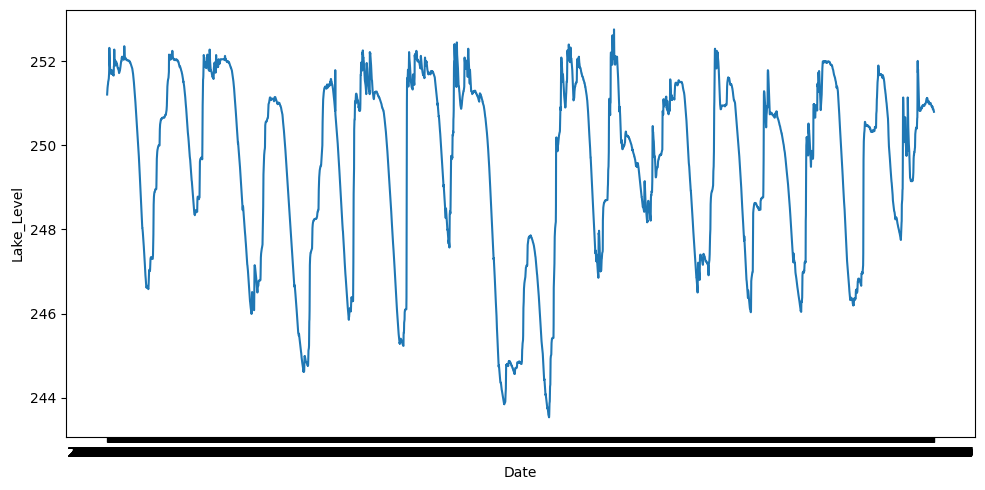

In [15]:
fig, axis = plt.subplots(figsize = (10, 5))

sns.lineplot(data = ts)

plt.tight_layout()

plt.show

### 2006-2007

<function matplotlib.pyplot.show(close=None, block=None)>

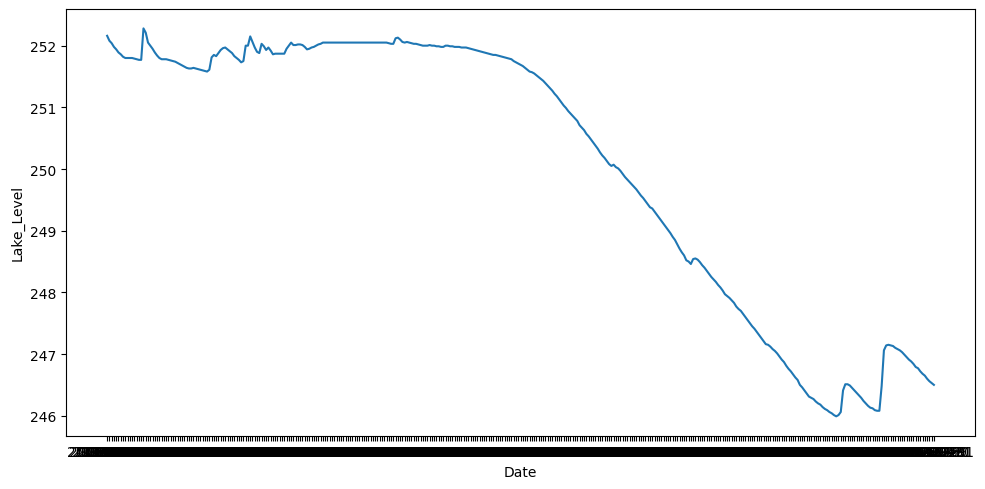

In [16]:
start_date = "2006-01-01"
end_date = "2007-01-01"

# selecciono periodo de observación
periodo = (ts.index> start_date) & (ts.index <= end_date)

fig, axis = plt.subplots(figsize = (10, 5))

sns.lineplot(data = ts.loc[periodo])

plt.tight_layout()

plt.show

## 2007-2008

<function matplotlib.pyplot.show(close=None, block=None)>

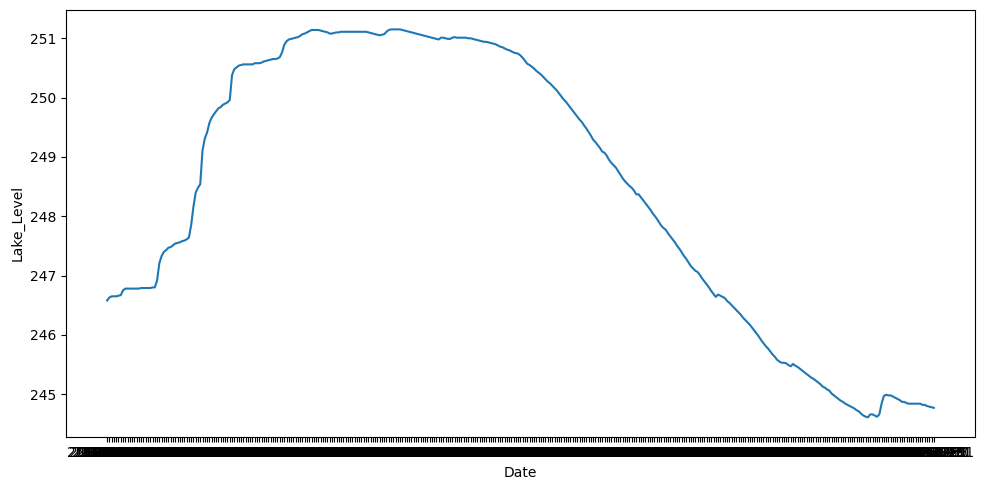

In [17]:
start_date = "2007-01-01"
end_date = "2008-01-01"

# selecciono periodo de observación
periodo = (ts.index> start_date) & (ts.index <= end_date)

fig, axis = plt.subplots(figsize = (10, 5))

sns.lineplot(data = ts.loc[periodo])

plt.tight_layout()

plt.show

## 2008-2009

<function matplotlib.pyplot.show(close=None, block=None)>

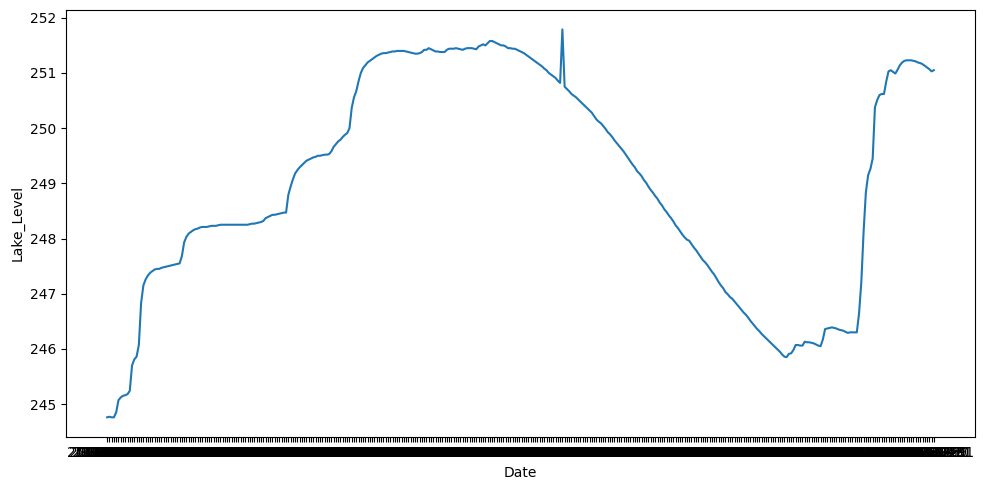

In [18]:
start_date = "2008-01-01"
end_date = "2009-01-01"

# selecciono periodo de observación
periodo = (ts.index> start_date) & (ts.index <= end_date)

fig, axis = plt.subplots(figsize = (10, 5))

sns.lineplot(data = ts.loc[periodo])

plt.tight_layout()

plt.show

## Visualmente observamos:
#### Tendencia bastante constante en pariodos largos.
#### Variabilidad: Cambios bruscos
#### Patrón: suele tenet el pico a mitad de año o cerca de la mitad.

In [19]:
decomposition = seasonal_decompose(ts, period = 12)
decomposition

## Análisis de tendencia

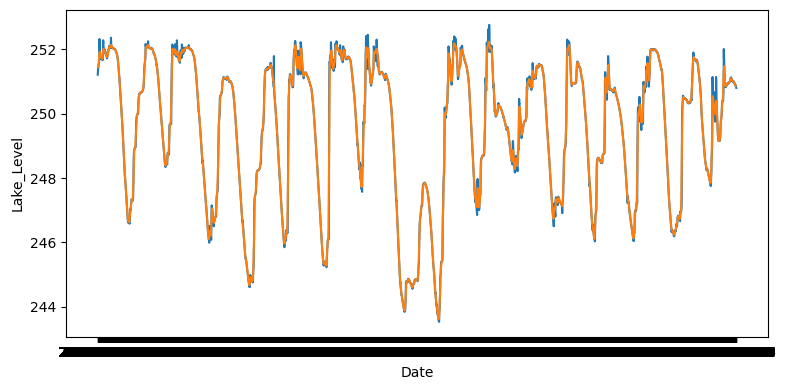

In [20]:
trend = decomposition.trend

fig, axis = plt.subplots(figsize = (8, 4))

sns.lineplot(data = ts)
sns.lineplot(data = trend)

plt.tight_layout()

plt.show()

## Análisis de estacionalidad

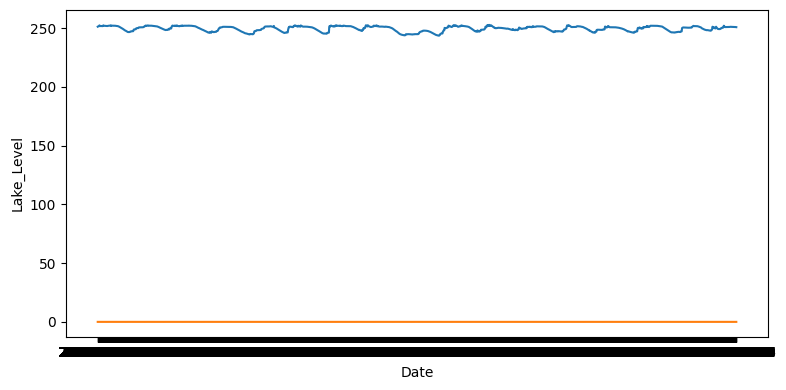

In [21]:
seasonal = decomposition.seasonal

fig, axis = plt.subplots(figsize = (8, 4))

sns.lineplot(data = ts)
sns.lineplot(data = seasonal)

plt.tight_layout()

plt.show()

In [22]:
def test_stationarity(timeseries):
    print("Resultados de la prueba de Dickey-Fuller:")
    dftest = adfuller(timeseries, autolag = "AIC")
    dfoutput = pd.Series(dftest[0:4], index = ["Test Statistic", "p-value", "#Lags Used", "Number of Observations Used"])
    for key,value in dftest[4].items():
        dfoutput["Critical Value (%s)"%key] = value
    return dfoutput

In [23]:
test_stationarity(ts)

Resultados de la prueba de Dickey-Fuller:


Test Statistic                -5.699711e+00
p-value                        7.726367e-07
#Lags Used                     2.700000e+01
Number of Observations Used    5.997000e+03
Critical Value (1%)           -3.431441e+00
Critical Value (5%)           -2.862022e+00
Critical Value (10%)          -2.567027e+00
dtype: float64

In [24]:
# miramos con "otra lupa"
# Diferenciar la serie para remover tendencia
level_diff = df
level_diff

,Rainfall_S_Piero,Rainfall_Mangona,Rainfall_S_Agata,Rainfall_Cavallina,Rainfall_Le_Croci,Temperature_Le_Croci,Lake_Level,Flow_Rate
Date,,,,,,,,
2004-01-02,0.0,0.0,0.0,0.0,0.0,6.50,251.21,0.5
2004-01-03,0.0,0.0,0.0,0.0,0.0,4.45,251.28,0.5
2004-01-04,0.0,0.0,0.0,0.0,0.0,2.00,251.35,0.5
2004-01-05,0.2,0.0,0.0,0.0,0.0,0.90,251.37,0.5
2004-01-06,0.0,0.0,0.0,0.0,0.0,2.25,251.42,0.5
...,...,...,...,...,...,...,...,...
2020-06-26,0.0,0.0,0.0,0.0,0.0,22.50,250.85,0.6
2020-06-27,0.0,0.0,0.0,0.0,0.0,23.40,250.84,0.6
2020-06-28,0.0,0.0,0.0,0.0,0.0,21.50,250.83,0.6


In [25]:
level_diff['diff_level'] = level_diff['Lake_Level'].diff().dropna()

ts_level_diff = level_diff['diff_level']
ts_level_diff.dropna(inplace=True)

ts_level_diff

Date
2004-01-03    0.07
2004-01-04    0.07
2004-01-05    0.02
2004-01-06    0.05
2004-01-07    0.01
              ... 
2020-06-26   -0.02
2020-06-27   -0.01
2020-06-28   -0.01
2020-06-29   -0.01
2020-06-30   -0.02
Name: diff_level, Length: 6024, dtype: float64

In [26]:
test_stationarity(ts_level_diff)

Resultados de la prueba de Dickey-Fuller:


Test Statistic                -1.120413e+01
p-value                        2.206320e-20
#Lags Used                     2.400000e+01
Number of Observations Used    5.999000e+03
Critical Value (1%)           -3.431441e+00
Critical Value (5%)           -2.862022e+00
Critical Value (10%)          -2.567027e+00
dtype: float64

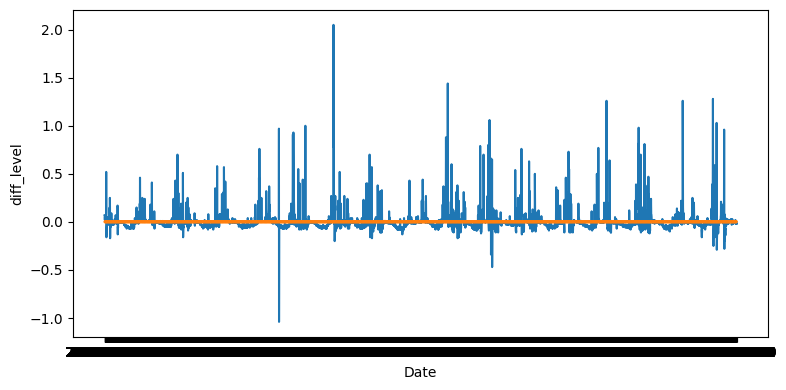

In [27]:
level_dif_decomposition = seasonal_decompose(ts_level_diff, period = 12)

level_dif_seasonal = level_dif_decomposition.seasonal

fig, axis = plt.subplots(figsize = (8, 4))

sns.lineplot(data = ts_level_diff)
sns.lineplot(data = level_dif_seasonal)

plt.tight_layout()

plt.show()

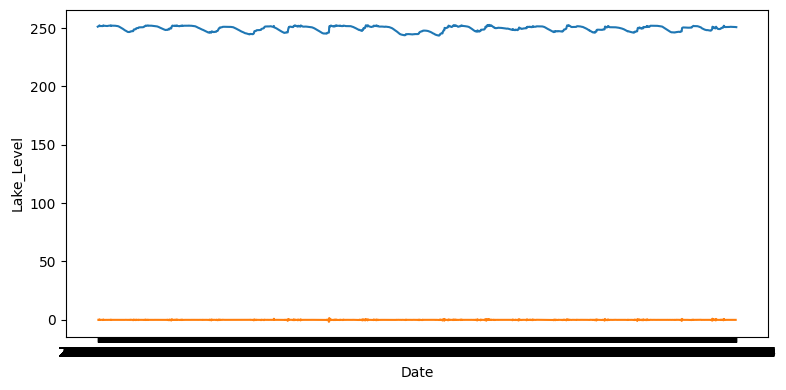

In [28]:
residual = decomposition.resid

fig, axis = plt.subplots(figsize = (8, 4))

sns.lineplot(data = ts)
sns.lineplot(data = residual)

plt.tight_layout()

plt.show()

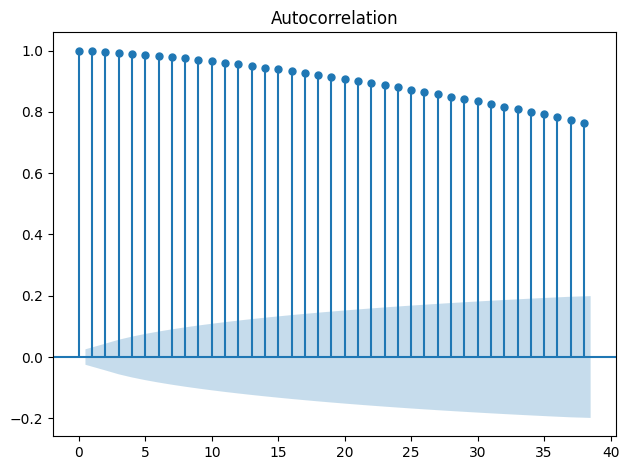

In [29]:
# cada lag es un mes
plot_acf(ts)

plt.tight_layout()

plt.show()

In [30]:
ts_stationary = ts.diff().dropna()

test_stationarity(ts_stationary)

Resultados de la prueba de Dickey-Fuller:


Test Statistic                -1.120413e+01
p-value                        2.206320e-20
#Lags Used                     2.400000e+01
Number of Observations Used    5.999000e+03
Critical Value (1%)           -3.431441e+00
Critical Value (5%)           -2.862022e+00
Critical Value (10%)          -2.567027e+00
dtype: float64

In [31]:
model = auto_arima(ts, seasonal = False, trace = True)

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=-11674.479, Time=2.48 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-10210.695, Time=0.22 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-11574.754, Time=0.17 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=-11234.019, Time=0.41 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-10212.692, Time=0.11 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=-11642.642, Time=1.50 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=-11678.687, Time=2.24 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=-11635.629, Time=0.92 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=-11626.163, Time=0.31 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=-11681.761, Time=2.77 sec
 ARIMA(3,1,0)(0,0,0)[0] intercept   : AIC=-11632.263, Time=0.38 sec
 ARIMA(4,1,1)(0,0,0)[0] intercept   : AIC=-11687.631, Time=3.06 sec
 ARIMA(4,1,0)(0,0,0)[0] intercept   : AIC=-11638.389, Time=0.50 sec
 ARIMA(5,1,1)(0,0,0)[0] intercept   : AIC=-11637.322, Time=0.71 sec
 ARIM

In [32]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                 6025
Model:               SARIMAX(3, 1, 1)   Log Likelihood                5850.809
Date:                Fri, 09 Aug 2024   AIC                         -11691.618
Time:                        18:25:40   BIC                         -11658.100
Sample:                    01-02-2004   HQIC                        -11679.980
                         - 06-30-2020                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.3314      0.013    103.981      0.000       1.306       1.356
ar.L2         -0.2999      0.007    -45.150      0.000      -0.313      -0.287
ar.L3         -0.0489      0.005    -10.350      0.000      -0.058      -0.040
ma.L1         -0.9373      0.013    -73.158      0.000      -0.962      -0.912
sigma2         0.0084   2.49e-05    337.457      0.000       0.008       0.008
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):           2112689.81
Prob(Q):                              0.99   Prob(JB):                         0.00
Heteroskedasticity (H):               1.38   Skew:                             5.87
Prob(H) (two-sided):                  0.00   Kurtosis:                        93.99
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [33]:
forecast = model.predict(12)
forecast

2020-07-01    250.789840
2020-07-02    250.782801
2020-07-03    250.777453
2020-07-04    250.772940
2020-07-05    250.768880
2020-07-06    250.765090
2020-07-07    250.761481
2020-07-08    250.758012
2020-07-09    250.754661
2020-07-10    250.751416
2020-07-11    250.748270
2020-07-12    250.745219
Freq: D, dtype: float64

In [34]:
ts

Date
2004-01-02    251.21
2004-01-03    251.28
2004-01-04    251.35
2004-01-05    251.37
2004-01-06    251.42
               ...  
2020-06-26    250.85
2020-06-27    250.84
2020-06-28    250.83
2020-06-29    250.82
2020-06-30    250.80
Name: Lake_Level, Length: 6025, dtype: float64

In [38]:
ts.index = pd.to_datetime(ts.index)

In [46]:
print(type(ts.index))
print(type(forecast.index))


<class 'pandas.core.indexes.datetimes.DatetimeIndex'>
<class 'pandas.core.indexes.datetimes.DatetimeIndex'>


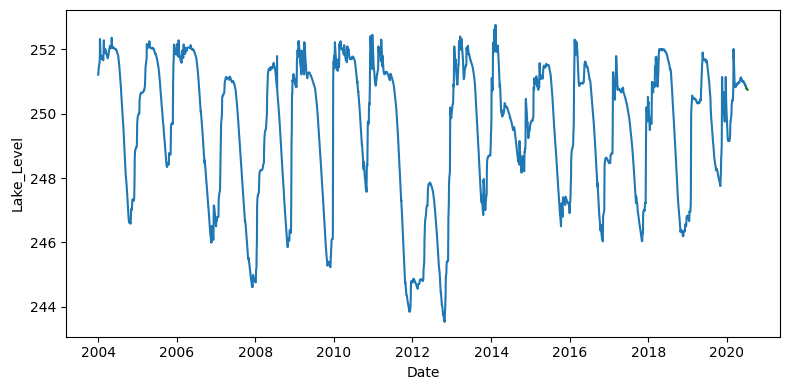

In [47]:
fig, axis = plt.subplots(figsize = (8, 4))

sns.lineplot(data = ts)
sns.lineplot(data = forecast, color = "green")

plt.tight_layout()

plt.show()

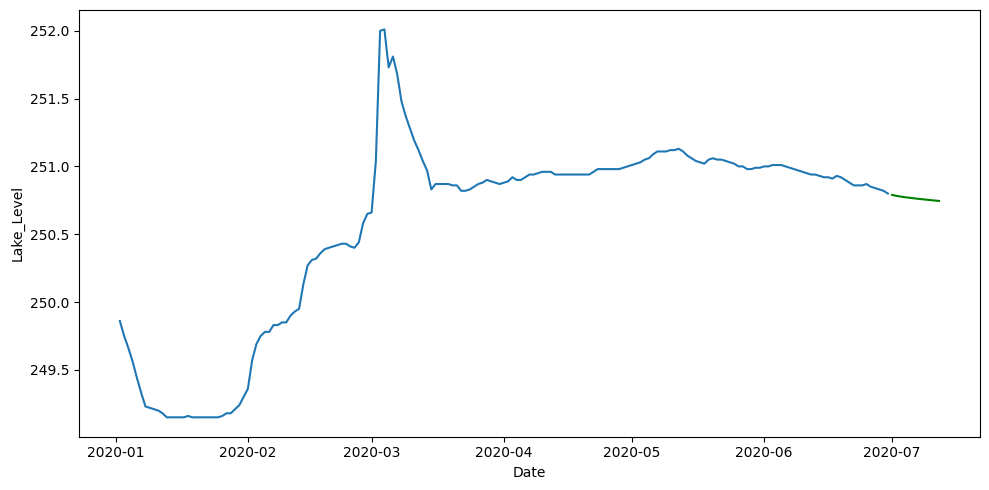

In [48]:
start_date = "2020-01-01"
end_date = "2020-06-30"

# selecciono periodo de observación
periodo = (ts.index> start_date) & (ts.index <= end_date)

fig, axis = plt.subplots(figsize = (10, 5))

sns.lineplot(data = ts.loc[periodo])
sns.lineplot(data = forecast, color = "green")

plt.tight_layout()